In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
countries = pd.read_csv('Datasets/countries-of-the-world.csv')
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [8]:
countries.rename(columns={'GDP ($ per capita)':'gdp'}, inplace=True)
countries.rename(columns={'Phones (per 1000)':'phones'}, inplace=True)

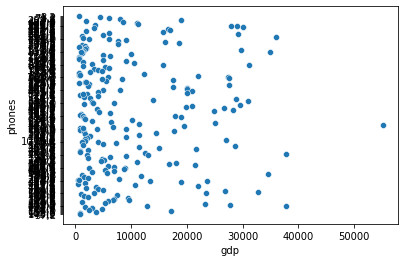

In [11]:
# Create scatter plot with GDP on the x-axis and number of phones on the y-axis
sns.scatterplot(x=countries.gdp, y=countries.phones)

# Show plot
plt.show()

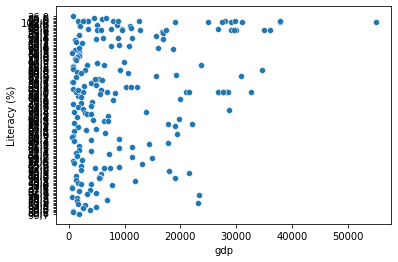

In [12]:
# Change this scatter plot to have percent literate on the y-axis
sns.scatterplot(x=countries.gdp, y=countries['Literacy (%)'])

# Show plot
plt.show()

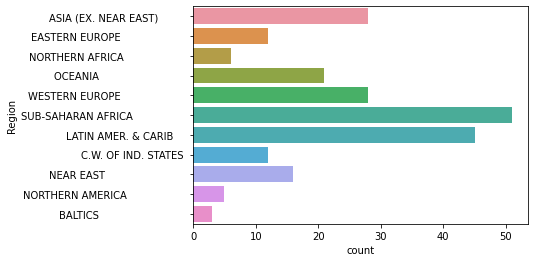

In [15]:
# Create count plot with region on the y-axis
sns.countplot(y=countries.Region)

# Show plot
plt.show()

In [24]:
survey = pd.read_csv('Datasets/young-people-survey-responses.csv', index_col=0)
survey.head()

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city
3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city
4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village


### How many young people surveyed report being scared of spiders? 

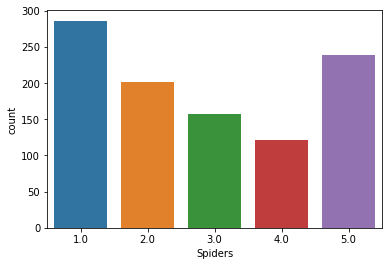

In [25]:
# Create a count plot with "Spiders" on the x-axis
sns.countplot(x='Spiders', data=survey)

# Display the plot
plt.show()

#### This plot shows us that most young people reported not being afraid of spiders.

In [5]:
student_data = pd.read_csv('Datasets/student-alcohol-consumption.csv', index_col=0)
student_data.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,GP,F,15,LE3,T,1,1,1,3,yes,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,GP,F,15,GT3,T,4,2,1,0,no,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,GP,F,16,GT3,T,3,3,1,0,no,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


### We'll look at the relationship between the number of absences they have in school and their final grade in the course, segmented by where the student lives (rural vs. urban area).

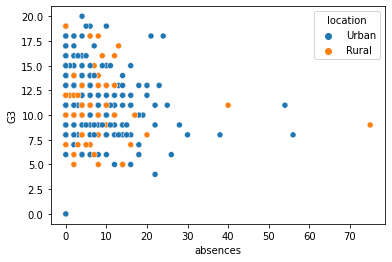

In [29]:
# Create a scatter plot of absences vs. final grade
sns.scatterplot(x='absences', y='G3', hue='location', data=student_data)
plt.show()

#### It looks like students with higher absences tend to have lower grades in both rural and urban areas.

### How many students live in urban vs. rural areas, and does this vary based on what school the student attends?

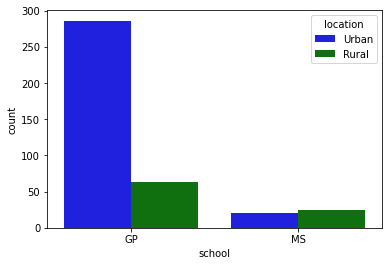

In [31]:
# Create a dictionary mapping subgroup values to colors
palette_colors = {"Rural": "green", "Urban": "blue"}

# Create a count plot of school with location subgroups
sns.countplot(x='school', data=student_data, hue='location', palette=palette_colors)

# Display plot
plt.show()

#### Students at GP tend to come from an urban location, but students at MS are more evenly split. 

## Relplot
We've seen in prior exercises that students with more absences ("absences") tend to have lower final grades ("G3"). Does this relationship hold regardless of how much time students study each week?

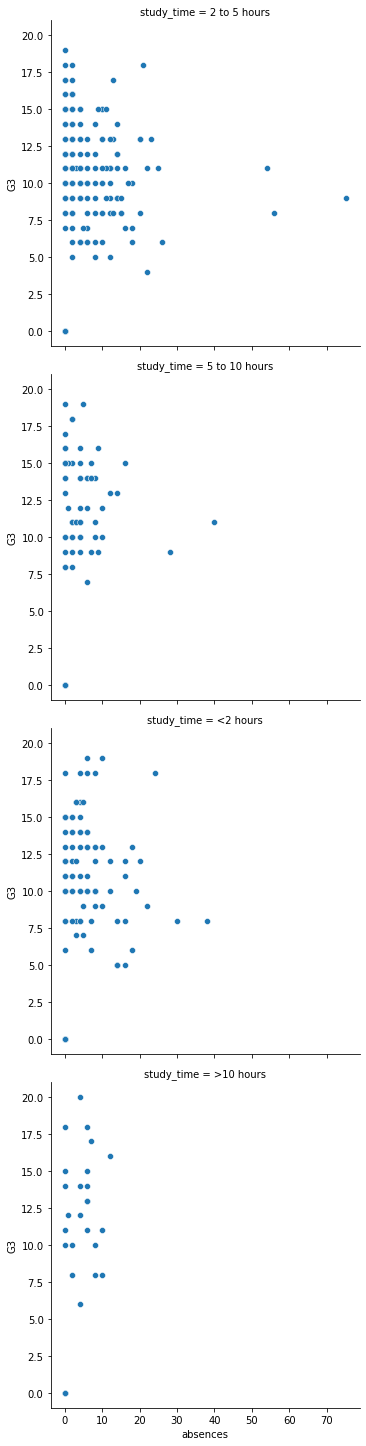

In [6]:
# Change this scatter plot to arrange the plots in rows instead of columns
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter", 
            row="study_time")

# Show plot
plt.show()

### Does a student's first semester grade ("G1") tend to correlate with their final grade ("G3")? 

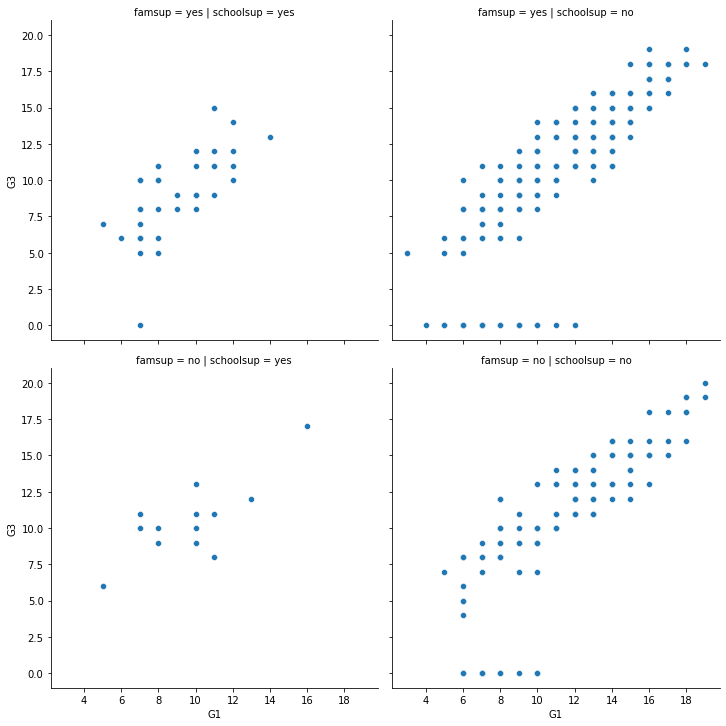

In [7]:
# Adjust further to add subplots based on family support
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter", 
            col="schoolsup", col_order=["yes", "no"], 
            row="famsup", row_order=['yes', 'no'])

# Show plot
plt.show()

#### It looks like the first semester grade does correlate with the final grade, regardless of what kind of support the student received.

### What is the relationship between the power of a car's engine ("horsepower") and its fuel efficiency ("mpg")? And how does this relationship vary by the number of cylinders ("cylinders") the car has?

In [8]:
mpg = pd.read_csv('Datasets/mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


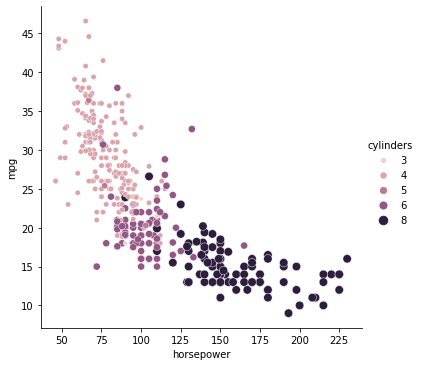

In [9]:
# Create scatter plot of horsepower vs. mpg
sns.relplot(x="horsepower", y="mpg", 
            data=mpg, kind="scatter", 
            size="cylinders", hue='cylinders')

# Show plot
plt.show()

#### Cars with higher horsepower tend to get a lower number of miles per gallon. They also tend to have a higher number of cylinders.

### Let's continue exploring Seaborn's mpg dataset by looking at the relationship between how fast a car can accelerate ("acceleration") and its fuel efficiency ("mpg"). Do these properties vary by country of origin ("origin")?

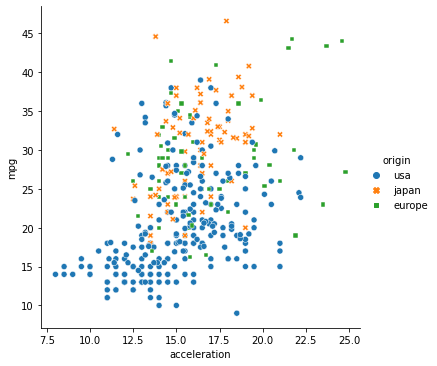

In [10]:
# Create a scatter plot of acceleration vs. mpg
sns.relplot(x="acceleration", y="mpg", 
            data=mpg, kind="scatter", 
            style="origin", hue="origin")

# Show plot
plt.show()

#### Cars from the USA tend to accelerate more quickly and get lower miles per gallon compared to cars from Europe and Japan.